In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline

In [56]:
#import customer churn dataset
dataset = pd.read_csv("C:\\Users\\samee\\Downloads\\archive.zip")

In [57]:
#for number of rows and columns
dataset.shape
#head of the dataset
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
#tail of the dataset
dataset.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [59]:
#types of dataset present
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [60]:
#basic statics about the numeric columns
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [61]:
#subsetting the columns
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [62]:
#replacing no as 0 and yes as 1 
dataset.loc[dataset.Churn=='No','Churn']= 0
dataset.loc[dataset.Churn=='Yes','Churn']= 1
#converting no internet service to no for the mentioned columns
cols = ['OnlineBackup','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTV']
for i in cols:
     dataset[i] = dataset[i].replace({'No internet service': 'No'})

In [63]:
#replace all the spaces with null values
dataset["TotalCharges"]=dataset["TotalCharges"].replace(" ",np.nan)

#drop null values of 'total charges' feature
dataset=dataset[dataset["TotalCharges"].notnull()]
dataset=dataset.reset_index()[dataset.columns]

#convert 'total changres' column values to float data type
dataset["TotalCharges"]=dataset["TotalCharges"].astype(float)


In [64]:
dataset["Churn"].value_counts().values

array([5163, 1869], dtype=int64)

In [65]:
#Visulalize total Churn pattern
plot_churn_labels = dataset["Churn"].value_counts().keys().tolist()
plot_churn_values =dataset["Churn"].value_counts().values.tolist()

plot_data = [
    go.Pie( labels = plot_churn_labels,
           values = plot_churn_values,
           marker = dict(colors =['Teal', 'magenta'],
                        line = dict(color = "white",
                               width = 2.5)),
                        rotation = 180,
          hoverinfo="label+value+text",
          hole =.6)
]
plot_layout = go.Layout(dict(title="Customer Churn",
                            plot_bgcolor = "rgb(243,243,243)" ,
                            paper_bgcolor = "rgb(243,243,243)"))
fig = go.Figure(data = plot_data, layout = plot_layout)
po.iplot(fig)

In [66]:
#Visulalize Churn Rate by Gender
plot_by_gender = dataset.groupby('gender').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x = plot_by_gender['gender'],
    y = plot_by_gender ['Churn'],
    width = [0.3, 0.3],
    marker = dict(
    color = ['magenta', 'teal'])
    )
]
plot_layout = go.Layout(
xaxis = {"type":"category"},
yaxis = {"title":"Churn Rate"},
title ='Churn Rate By gender',
plot_bgcolor = "rgb(243,243,243)" ,
 paper_bgcolor = "rgb(243,243,243)"
)
fig = go.Figure(data = plot_data, layout = plot_layout)
po.iplot(fig)

In [67]:
#Visualize Churn Rate by Tech Support
plot_by_techsupport = dataset.groupby('TechSupport').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x = plot_by_techsupport['TechSupport'],
    y = plot_by_techsupport ['Churn'],
    width = [0.3, 0.3,0.3],
        marker = dict(
    color = ['red', 'cyan', 'teal'])
    )
]
plot_layout = go.Layout(
xaxis = {"type":"category"},
yaxis = {"title":"Churn Rate"},
title ='Churn Rate By Tech Support',
plot_bgcolor = "rgb(243,243,243)" ,
 paper_bgcolor = "rgb(243,243,243)"
)
fig = go.Figure(data = plot_data, layout = plot_layout)
po.iplot(fig)    

In [68]:
#Visualize Churn Rate by Internet Services
plot_by_internetservices = dataset.groupby('InternetService').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x = plot_by_internetservices['InternetService'],
    y = plot_by_internetservices ['Churn'],
    width = [0.3, 0.3,0.3],
        marker = dict(
    color = ['red', 'cyan', 'teal'])
    )
]
plot_layout = go.Layout(
xaxis = {"type":"category"},
yaxis = {"title":"Churn Rate"},
title ='Churn Rate By Internet Services',
plot_bgcolor = "rgb(243,243,243)" ,
 paper_bgcolor = "rgb(243,243,243)"
)
fig = go.Figure(data = plot_data, layout = plot_layout)
po.iplot(fig)


In [69]:
#Visualize Churn Rate by Payment Method
plot_by_payment = dataset.groupby('PaymentMethod').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x = plot_by_payment ['PaymentMethod'],
    y = plot_by_payment ['Churn'],
    width = [0.3, 0.3,0.3,0.3],
        marker = dict(
    color = ['red', 'cyan', 'teal', 'yellow'])
    )
]
plot_layout = go.Layout(
xaxis = {"type":"category"},
yaxis = {"title":"Churn Rate"},
title ='Churn Rate By Payment Method',
plot_bgcolor = "rgb(243,243,243)" ,
 paper_bgcolor = "rgb(243,243,243)"
)
fig = go.Figure(data = plot_data, layout = plot_layout)
po.iplot(fig)

In [70]:
#Visulaize Churn Rate By  Contract Duration
plot_by_payment = dataset.groupby('Contract').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x = plot_by_payment ['Contract'],
    y = plot_by_payment ['Churn'],
    width = [0.3, 0.3,0.3],
        marker = dict(
    color = ['red', 'cyan', 'blue'])
    )
]
plot_layout = go.Layout(
xaxis = {"type":"category"},
yaxis = {"title":"Churn Rate"},
title ='Churn Rate By Contact Duration',
plot_bgcolor = "rgb(243,243,243)" ,
 paper_bgcolor = "rgb(243,243,243)"
)
fig = go.Figure(data = plot_data, layout = plot_layout)
po.iplot(fig)

In [71]:
#Visualize Relation between Tenure and Churn Rate 
plot_by_tenure = dataset.groupby('tenure').Churn.mean().reset_index()
plot_data = [
    go.Scatter(
        x = plot_by_tenure ['tenure'],
    y = plot_by_tenure ['Churn'],
    mode = 'markers',
    name = 'Low',
        marker = dict(size = 5,
        line = dict(width = 0.8),
        color = 'yellow'
    ),
    )
]
plot_layout = go.Layout(
xaxis = {"title":"tenure"},
yaxis = {"title":"Churn Rate"},
title ='Relation between tenure and Churn rate',
plot_bgcolor = "rgb(243,243,243)" ,
 paper_bgcolor = "rgb(243,243,243)"
)
fig = go.Figure(data = plot_data, layout = plot_layout)
po.iplot(fig)

In [72]:
#Categorical Variable encoding 
dataset = pd.read_csv("C:\\Users\\samee\\Downloads\\archive.zip")
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
#Perform One Hot Encoding using get_dummies method
import pandas as pd

dataset = pd.get_dummies(dataset, columns=['Contract', 'Dependents', 'DeviceProtection', 'gender',
                                                       'InternetService', 'MultipleLines', 'OnlineBackup',
                                                       'OnlineSecurity', 'PaperlessBilling', 'Partner',
                                                       'PaymentMethod', 'PhoneService', 'SeniorCitizen',
                                                       'StreamingMovies', 'StreamingTV', 'TechSupport'],
                                drop_first=True)

In [74]:
#for converting to float value
#replace all the spaces with null values
dataset["TotalCharges"]=dataset["TotalCharges"].replace(" ",np.nan)

#drop null values of 'total charges' feature
dataset=dataset[dataset["TotalCharges"].notnull()]
dataset=dataset.reset_index()[dataset.columns]

#convert 'total changres' column values to float data type
dataset["TotalCharges"]=dataset["TotalCharges"].astype(float)

#replacing no as 0 and yes as 1 
dataset.loc[dataset.Churn=='No','Churn']= 0
dataset.loc[dataset.Churn=='Yes','Churn']= 1

#Perform Feature Scaling and One Hot Encoding
from sklearn.preprocessing import StandardScaler

#Perform Feature Scaling on 'tenure', 'MonthlyCharges', 'TotalCharges' in order to bring them on same scale
standardScaler = StandardScaler()
columns_for_ft_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Apply the feature scaling operation on dataset using fit_transform() method
dataset[columns_for_ft_scaling] = standardScaler.fit_transform(dataset[columns_for_ft_scaling])
# See subset of values
dataset.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,7795-CFOCW,0.512486,-0.747850,-0.195248,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,9237-HQITU,-1.239504,0.196178,-0.940457,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [75]:
print(dataset.columns)

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_One year', 'Contract_Two year', 'Dependents_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'PaperlessBilling_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneService_Yes', 'SeniorCitizen_1',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes'],
      dtype='object')


In [76]:
# Label encoding (converts categorical values to numerical labels)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_encoded = dataset.copy()
data_encoded["Churn"] = encoder.fit_transform(data_encoded["Churn"])

In [77]:
#Create Feature variable X and Target variable y
y = data_encoded['Churn']
X = dataset.drop(['customerID','Churn',
       'Contract_One year', 'Contract_Two year', 'Dependents_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'PaperlessBilling_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneService_Yes', 'SeniorCitizen_1',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes'], axis = 1)

In [78]:
#Split the data into training set (70%) and test set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

# Convert the splits to DataFrames
train_data = pd.DataFrame(X_train, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
train_data['Churn'] = y_train

test_data = pd.DataFrame(X_test, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
test_data['Churn'] = y_test

# Save the DataFrames as CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [80]:
# Machine Learning classification model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Load the train and test data from CSV files
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Assuming the columns 'tenure', 'MonthlyCharges', and 'TotalCharges' are present in the CSV files
X_train = train_data[['tenure', 'MonthlyCharges', 'TotalCharges']]
y_train = train_data['Churn']

X_test = test_data[['tenure', 'MonthlyCharges', 'TotalCharges']]
y_test = test_data['Churn']

In [82]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Fit the Logistic Regression Model
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train, y_train)

# Predict the values for new, unseen data
log_pred = logmodel.predict(X_test)

# Create a dataframe to store the predictions and expected values
log_prediction_df = pd.DataFrame({'Expected': y_test, 'Predicted': log_pred})

# Save the dataframe to a CSV file
log_prediction_df.to_csv('logistic_prediction_results.csv', index=False)

# Calculate and print the accuracy
logistic_accuracy = round(metrics.accuracy_score(y_test, log_pred) * 100, 2)
print(f"Logistic Regression Accuracy: {logistic_accuracy}%")

print("Prediction vs Expected (Logistic Regression):")
print(log_prediction_df)


Logistic Regression Accuracy: 78.96%
Prediction vs Expected (Logistic Regression):
      Expected  Predicted
0            0          0
1            0          0
2            0          0
3            0          0
4            0          0
...        ...        ...
2105         0          0
2106         1          0
2107         0          0
2108         0          0
2109         0          1

[2110 rows x 2 columns]


In [84]:
import pandas as pd
from sklearn.svm import SVC
from sklearn import metrics

# Fit the Support Vector Machine Model
svcmodel = SVC(kernel='linear', random_state=50, probability=True)
svcmodel.fit(X_train, y_train)

# Predict the value for new, unseen data
svc_pred = svcmodel.predict(X_test)

# Create a dataframe to store the predictions and expected values
prediction_df = pd.DataFrame({'Expected': y_test, 'Predicted': svc_pred})

# Save the dataframe to a CSV file
prediction_df.to_csv('prediction_results.csv', index=False)

# Calculate and print the accuracy
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)
print(f"SVM Accuracy: {svc_accuracy}%")

print("Prediction vs Expected:")
print(prediction_df)


SVM Accuracy: 78.44%
Prediction vs Expected:
      Expected  Predicted
0            0          0
1            0          0
2            0          0
3            0          0
4            0          0
...        ...        ...
2105         0          0
2106         1          0
2107         0          0
2108         0          0
2109         0          1

[2110 rows x 2 columns]


In [86]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Assuming you already have X_train, y_train, X_test, y_test

# Fit the K-Nearest Neighbor Model
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knnmodel.fit(X_train, y_train)

# Predict the value for new, unseen data
knn_pred = knnmodel.predict(X_test)

# Create a dataframe to store the predictions and expected values
prediction_df = pd.DataFrame({'Expected': y_test, 'Predicted': knn_pred})

# Save the dataframe to a CSV file
prediction_df.to_csv('knn_prediction_results.csv', index=False)

# Calculate and print the accuracy
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)
print(f"KNN Accuracy: {knn_accuracy}%")

print("Expected vs Predicted:")
print(prediction_df)


KNN Accuracy: 77.96%
Expected vs Predicted:
      Expected  Predicted
0            0          0
1            0          0
2            0          0
3            0          0
4            0          1
...        ...        ...
2105         0          0
2106         1          0
2107         0          0
2108         0          0
2109         0          1

[2110 rows x 2 columns]


In [88]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Assuming you already have X_train, y_train, X_test, y_test

# Fit the Decision Tree Classification Model
dtmodel = DecisionTreeClassifier(criterion="gini", random_state=50)
dtmodel.fit(X_train, y_train)

# Predict the value for new, unseen data
dt_pred = dtmodel.predict(X_test)

# Create a dataframe to store the predictions and expected values
prediction_df = pd.DataFrame({'Expected': y_test, 'Predicted': dt_pred})

# Save the dataframe to a CSV file
prediction_df.to_csv('decision_tree_prediction_results.csv', index=False)

# Calculate and print the accuracy
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)
print(f"Decision Tree Accuracy: {dt_accuracy}%")

print("Expected vs Predicted:")
print(prediction_df)


Decision Tree Accuracy: 72.42%
Expected vs Predicted:
      Expected  Predicted
0            0          0
1            0          0
2            0          1
3            0          0
4            0          1
...        ...        ...
2105         0          0
2106         1          1
2107         0          0
2108         0          0
2109         0          0

[2110 rows x 2 columns]


In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Assuming you already have X_train, y_train, X_test, y_test

# Fit the Random Forest Classification Model
rfmodel = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rfmodel.fit(X_train, y_train)

# Predict the value for new, unseen data
rf_pred = rfmodel.predict(X_test)

# Create a dataframe to store the predictions and expected values
prediction_df = pd.DataFrame({'Expected': y_test, 'Predicted': rf_pred})

# Save the dataframe to a CSV file
prediction_df.to_csv('random_forest_prediction_results.csv', index=False)

# Calculate and print the accuracy
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)
print(f"Random Forest Accuracy: {rf_accuracy}%")

print("Expected vs Predicted:")
print(prediction_df)



Random Forest Accuracy: 76.64%
Expected vs Predicted:
      Expected  Predicted
0            0          0
1            0          0
2            0          1
3            0          0
4            0          0
...        ...        ...
2105         0          0
2106         1          0
2107         0          0
2108         0          0
2109         0          0

[2110 rows x 2 columns]


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Load the data
data = pd.read_csv("C:\\Users\\samee\\Downloads\\archive.zip")  

# Label encoding for 'MonthlyCharges', 'TotalCharges', 'tenure'
label_encoder = LabelEncoder()  
data['MonthlyCharges'] = label_encoder.fit_transform(data['MonthlyCharges'])
data['TotalCharges'] = label_encoder.fit_transform(data['TotalCharges'])
data['tenure'] = label_encoder.fit_transform(data['tenure'])

# Label encoding for 'Churn'
data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Split data into features (X) and target (y)
X = data[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = data['Churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model with softmax activation for multi-class classification
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
nn_pred = model.predict(X_test)

# Calculate and print the accuracy
nn_accuracy = round(metrics.accuracy_score(y_test, nn_pred) * 100, 2)
print(f"Neural Network Accuracy: {nn_accuracy}%")

# Create a dataframe to store the predictions and expected values
nn_prediction_df = pd.DataFrame({'Expected': y_test, 'Predicted': nn_pred})

# Save the dataframe to a CSV file
nn_prediction_df.to_csv('neural_network_prediction_results.csv', index=False)

print("Expected vs Predicted:")
print(nn_prediction_df)


Neural Network Accuracy: 78.89%
Expected vs Predicted:
      Expected  Predicted
2200         0          0
4627         0          0
3225         0          0
2828         0          0
3768         0          0
...        ...        ...
4448         1          0
1231         0          0
3304         0          0
4805         0          0
5843         0          0

[2113 rows x 2 columns]


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Load the data
data = pd.read_csv("C:\\Users\\samee\\Downloads\\archive.zip")

# Label encoding for 'MonthlyCharges', 'TotalCharges', 'tenure'
label_encoder = LabelEncoder()
data['MonthlyCharges'] = label_encoder.fit_transform(data['MonthlyCharges'])
data['TotalCharges'] = label_encoder.fit_transform(data['TotalCharges'])
data['tenure'] = label_encoder.fit_transform(data['tenure'])

# Binary encoding for 'Churn'
data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Split data into features (X) and target (y)
X = data[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = data['Churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Min-Max Scaling for the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model with a different activation function and hidden layer sizes
model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='logistic', solver='adam', max_iter=1000, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
nn1_pred = model.predict(X_test)

# Calculate and print the accuracy
nn1_accuracy = round(metrics.accuracy_score(y_test, nn_pred) * 100, 2)
print(f"Neural Network 1 Accuracy: {nn1_accuracy}%")

# Create a dataframe to store the predictions and expected values
nn1_prediction_df = pd.DataFrame({'Expected': y_test, 'Predicted': nn_pred})

# Save the dataframe to a CSV file
nn1_prediction_df.to_csv('neural_network_prediction1_results.csv', index=False)

print("Expected vs Predicted:")
print(nn1_prediction_df)


Neural Network 1 Accuracy: 78.89%
Expected vs Predicted:
      Expected  Predicted
2200         0          0
4627         0          0
3225         0          0
2828         0          0
3768         0          0
...        ...        ...
4448         1          0
1231         0          0
3304         0          0
4805         0          0
5843         0          0

[2113 rows x 2 columns]


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Load the data
data = pd.read_csv("C:\\Users\\samee\\Downloads\\archive.zip")  

# Label encoding for 'MonthlyCharges', 'TotalCharges', 'tenure'
label_encoder = LabelEncoder()
data['MonthlyCharges'] = label_encoder.fit_transform(data['MonthlyCharges'])
data['TotalCharges'] = label_encoder.fit_transform(data['TotalCharges'])
data['tenure'] = label_encoder.fit_transform(data['tenure'])

# Binary encoding for 'Churn'
data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Split data into features (X) and target (y)
X = data[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = data['Churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model with tanh activation
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='tanh', solver='adam', max_iter=1000, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
nn2_pred = model.predict(X_test)

# Calculate and print the accuracy
nn2_accuracy = round(metrics.accuracy_score(y_test, nn2_pred) * 100, 2)
print(f"Neural Network 2 Accuracy: {nn2_accuracy}%")

# Create a dataframe to store the predictions and expected values
nn2_prediction_df = pd.DataFrame({'Expected': y_test, 'Predicted': nn_pred})

# Save the dataframe to a CSV file
nn2_prediction_df.to_csv('neural_network_prediction2_results.csv', index=False)

print("Expected vs Predicted:")
print(nn2_prediction_df)


Neural Network 2 Accuracy: 77.95%
Expected vs Predicted:
      Expected  Predicted
2200         0          0
4627         0          0
3225         0          0
2828         0          0
3768         0          0
...        ...        ...
4448         1          0
1231         0          0
3304         0          0
4805         0          0
5843         0          0

[2113 rows x 2 columns]


In [42]:
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest', 'Neural Network', 'Neural Network 1', 'Neural Network 2'],
    'Score': [logistic_accuracy, svc_accuracy, knn_accuracy, 
              dt_accuracy, rf_accuracy, nn_accuracy,nn1_accuracy,nn2_accuracy]})

# Sort the dataframe by Score (Accuracy) in descending order
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

# Print the sorted dataframe
print(Model_Comparison_df)

                        Model
Score                        
78.96     Logistic Regression
78.89          Neural Network
78.89        Neural Network 1
78.44  Support Vector Machine
77.96      K-Nearest Neighbor
77.95        Neural Network 2
76.64           Random Forest
72.42           Decision Tree


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Load the data
data = pd.read_csv("C:\\Users\\samee\\Downloads\\archive.zip")

# Label encoding for 'MonthlyCharges', 'TotalCharges', 'tenure'
label_encoder = LabelEncoder()
data['MonthlyCharges'] = label_encoder.fit_transform(data['MonthlyCharges'])
data['TotalCharges'] = label_encoder.fit_transform(data['TotalCharges'])
data['tenure'] = label_encoder.fit_transform(data['tenure'])

# Binary encoding for 'Churn'
data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Split data into features (X) and target (y)
X = data[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = data['Churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, so using sigmoid activation

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict on the test data
nn_pred_prob = model.predict(X_test)
nn_pred = np.round(nn_pred_prob).astype(int)

# Calculate and print the accuracy
nn_accuracy = round(accuracy_score(y_test, nn_pred) * 100, 2)
print(f"Neural Network Accuracy: {nn_accuracy}%")

# Create a dataframe to store the predictions and expected values
nn_prediction_df = pd.DataFrame({'Expected': y_test, 'Predicted': nn_pred.flatten(), 'Predicted_Probability': nn_pred_prob.flatten()})

# Save the dataframe to a CSV file
nn_prediction_df.to_csv('neural_network_prediction_results.csv', index=False)

print("Expected vs Predicted:")
print(nn_prediction_df)


Epoch 1/10
155/155 [==============================] - 1s 1ms/step - loss: 0.5257 - accuracy: 0.7264
Epoch 2/10
155/155 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.7815
Epoch 3/10
155/155 [==============================] - 0s 948us/step - loss: 0.4526 - accuracy: 0.7783
Epoch 4/10
155/155 [==============================] - 0s 880us/step - loss: 0.4515 - accuracy: 0.7809
Epoch 5/10
155/155 [==============================] - 0s 880us/step - loss: 0.4513 - accuracy: 0.7840
Epoch 6/10
155/155 [==============================] - 0s 901us/step - loss: 0.4506 - accuracy: 0.7852
Epoch 7/10
155/155 [==============================] - 0s 997us/step - loss: 0.4502 - accuracy: 0.7815
Epoch 8/10
155/155 [==============================] - 0s 903us/step - loss: 0.4479 - accuracy: 0.7850
Epoch 9/10
155/155 [==============================] - 0s 876us/step - loss: 0.4492 - accuracy: 0.7860
Epoch 10/10
67/67 [==============================] - 0s 675us/step
Neural Network Accu

Epoch 1/50
493/493 [==============================] - 1s 1ms/step - loss: 0.4498 - accuracy: 0.7864 - val_loss: 0.4577 - val_accuracy: 0.7851
Epoch 2/50
493/493 [==============================] - 1s 1ms/step - loss: 0.4489 - accuracy: 0.7836 - val_loss: 0.4556 - val_accuracy: 0.7761
Epoch 3/50
493/493 [==============================] - 1s 1ms/step - loss: 0.4478 - accuracy: 0.7890 - val_loss: 0.4696 - val_accuracy: 0.7686
Epoch 4/50
493/493 [==============================] - 1s 1ms/step - loss: 0.4467 - accuracy: 0.7840 - val_loss: 0.4543 - val_accuracy: 0.7785
Epoch 5/50
493/493 [==============================] - 1s 1ms/step - loss: 0.4470 - accuracy: 0.7882 - val_loss: 0.4563 - val_accuracy: 0.7752
Epoch 6/50
493/493 [==============================] - 1s 1ms/step - loss: 0.4470 - accuracy: 0.7895 - val_loss: 0.4521 - val_accuracy: 0.7837
Epoch 7/50
493/493 [==============================] - 1s 1ms/step - loss: 0.4464 - accuracy: 0.7880 - val_loss: 0.4528 - val_accuracy: 0.7837
Epoch 

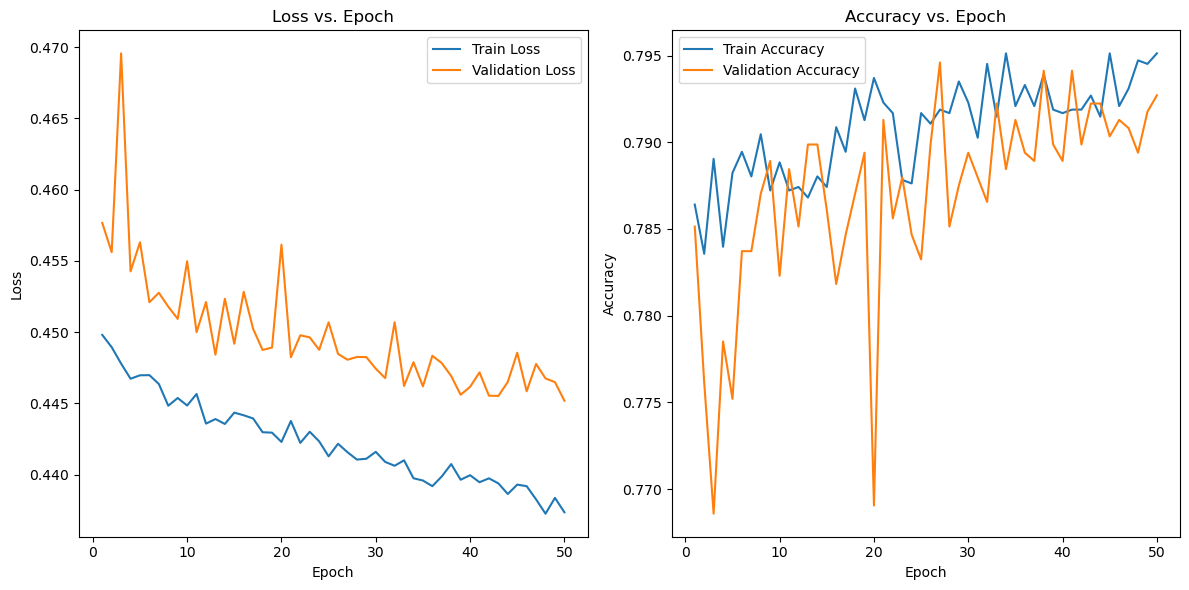

In [44]:
import matplotlib.pyplot as plt
# Train the model and get the training history
epochs = 50
batch_size = 10
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test))

# Get loss and accuracy values from the history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot loss vs. epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss, label='Train Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

# Plot accuracy vs. epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, epochs + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()
